# Number of Clusters for Gaussian Mixtures

## Figure 6.9

In [1]:
"""
Number of Clusters for Gaussian Mixtures
----------------------------------------
Figure 6.9

The BIC-optimized number of components in a Gaussian mixture model as a
function of the sample size. All three samples (with 100, 1000, and 10,000
points) are drawn from the same distribution: two narrow foreground Gaussians
and two wide background Gaussians. The top-right panel shows the BIC as a
function of the number of components in the mixture. The remaining panels show
the distribution of points in the sample and the 1, 2, and 3 standard deviation
contours of the best-fit mixture model.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general


'\nNumber of Clusters for Gaussian Mixtures\n----------------------------------------\nFigure 6.9\n\nThe BIC-optimized number of components in a Gaussian mixture model as a\nfunction of the sample size. All three samples (with 100, 1000, and 10,000\npoints) are drawn from the same distribution: two narrow foreground Gaussians\nand two wide background Gaussians. The top-right panel shows the BIC as a\nfunction of the number of components in the mixture. The remaining panels show\nthe distribution of points in the sample and the 1, 2, and 3 standard deviation\ncontours of the best-fit mixture model.\n'

In [2]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from astroML.utils import convert_2D_cov
from astroML.plotting.tools import draw_ellipse


/Users/dagoret/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [3]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [4]:
#------------------------------------------------------------
# Set up the dataset
#  We'll use scikit-learn's Gaussian Mixture Model to sample
#  data from a mixture of Gaussians.  The usual way of using
#  this involves fitting the mixture to data: we'll see that
#  below.  Here we'll set the internal means, covariances,
#  and weights by-hand.

# we'll define clusters as (mu, sigma1, sigma2, alpha, frac)
clusters = [((50, 50), 20, 20, 0, 0.1),
            ((40, 40), 10, 10, np.pi / 6, 0.6),
            ((80, 80), 5, 5, np.pi / 3, 0.2),
            ((60, 60), 30, 30, 0, 0.1)]

gmm_input = GaussianMixture(len(clusters), covariance_type='full')
gmm_input.means_ = np.array([c[0] for c in clusters])
gmm_input.covariances_ = np.array([convert_2D_cov(*c[1:4]) for c in clusters])
gmm_input.weights_ = np.array([c[4] for c in clusters])
gmm_input.weights_ /= gmm_input.weights_.sum()
gmm_input.precisions_cholesky_ = 1 / np.sqrt(gmm_input.covariances_)
gmm_input.fit = None


/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_17414/3792311058.py:20: RuntimeWarning: divide by zero encountered in true_divide
  gmm_input.precisions_cholesky_ = 1 / np.sqrt(gmm_input.covariances_)


100 points convergence: [True, True, True, True, True, True, True]
1000 points convergence: [True, True, True, True, True, True, True]
10000 points convergence: [True, True, True, True, True, True, True]


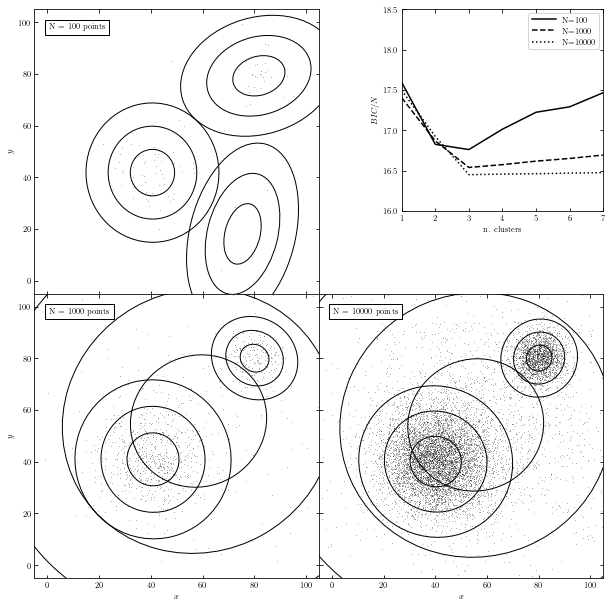

In [6]:

#------------------------------------------------------------
# Compute and plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.11, right=0.9, bottom=0.11, top=0.9,
                    hspace=0, wspace=0)
ax_list = [fig.add_subplot(s) for s in [221, 223, 224]]
ax_list.append(fig.add_axes([0.62, 0.62, 0.28, 0.28]))

linestyles = ['-', '--', ':']

grid = np.linspace(-5, 105, 70)
Xgrid = np.array(np.meshgrid(grid, grid))
Xgrid = Xgrid.reshape(2, -1).T

Nclusters = np.arange(1, 8)
for Npts, ax, ls in zip([100, 1000, 10000], ax_list, linestyles):
    np.random.seed(1)
    X = gmm_input.sample(Npts)[0]

    # find best number of clusters via BIC
    clfs = [GaussianMixture(N, max_iter=500).fit(X)
            for N in Nclusters]
    BICs = np.array([clf.bic(X) for clf in clfs])
    print("{0} points convergence:".format(Npts),
          [clf.converged_ for clf in clfs])

    # plot the BIC
    ax_list[3].plot(Nclusters, BICs / Npts, ls, c='k',
                    label="N=%i" % Npts)

    clf = clfs[np.argmin(BICs)]
    log_dens = clf.score_samples(Xgrid).reshape((70, 70))

    # scatter the points
    ax.plot(X[:, 0], X[:, 1], ',k', alpha=0.3, zorder=1)

    # plot the components
    for i in range(clf.n_components):
        mean = clf.means_[i]
        cov = clf.covariances_[i]
        if cov.ndim == 1:
            cov = np.diag(cov)
        draw_ellipse(mean, cov, ax=ax, fc='none', ec='k', zorder=2)

    # label the plot
    ax.text(0.05, 0.95, "N = %i points" % Npts,
            ha='left', va='top', transform=ax.transAxes,
            bbox=dict(fc='w', ec='k'))

    ax.set_xlim(-5, 105)
    ax.set_ylim(-5, 105)


ax_list[0].xaxis.set_major_formatter(plt.NullFormatter())
ax_list[2].yaxis.set_major_formatter(plt.NullFormatter())

for i in (0, 1):
    ax_list[i].set_ylabel('$y$')

for j in (1, 2):
    ax_list[j].set_xlabel('$x$')

ax_list[-1].legend(loc=1)

ax_list[-1].set_xlabel('n. clusters')
ax_list[-1].set_ylabel('$BIC / N$')
ax_list[-1].set_ylim(16, 18.5)

plt.show()
